# Part I - Understanding Business Loans
## by Sara Glattstein

## Introduction

> For this project I will be looking at the Prosper Loans Dataset. Information about it can be found here: https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit?gid=0#gid=0, but I will also cover some of the details within this report.

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


> Here I am going through the process of loading in the dataset. I will describe its properties towards the end of this section after I cut the data down to a more managable size.

In [2]:
#Reading in the information and setting it to a raw dataframe
df_raw = pd.read_csv("./prosperLoanData.csv")
df_raw.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
#Displaying the information to get a good sense of what needs to be done next
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

After loading in this dataset, I can see that there are many columns that will not be very useful for my analysis. I will remove them now and save the cut down result as a separate dataset so that the raw data in not affected.

In [4]:
drops = ['ListingKey', 'GroupKey', 'LoanKey', 'MemberKey',
         'ListingNumber', 'ListingCreationDate',
          'LP_CustomerPayments', 'LP_CustomerPrincipalPayments',
         'LP_InterestandFees', 'LP_ServiceFees', 'LP_CollectionFees',
         'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss',
         'LP_NonPrincipalRecoverypayments', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 
         'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn',
         'BorrowerState', 'LoanOriginationQuarter', 'TradesOpenedLast6Months', 
        'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
        'ProsperScore', 'CurrentlyInGroup', 'EmploymentStatusDuration', 'FirstRecordedCreditLine', 
        'TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate',
        'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 
        'ScorexChangeAtTimeOfListing', 'DateCreditPulled', 'OpenCreditLines', 'TotalCreditLinespast7years',
        'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'BankcardUtilization', 'AvailableBankcardCredit',
        'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 'RevolvingCreditBalance',
        'TradesOpenedLast6Months', 'CurrentCreditLines', 'LoanNumber',
        'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies', 'TradesNeverDelinquent (percentage)',
         'DelinquenciesLast7Years', 'AmountDelinquent',
        'StatedMonthlyIncome', 'IncomeVerifiable', 'ClosedDate', 'DebtToIncomeRatio',
        'Occupation', 'LoanOriginationDate', 'TotalTrades']
df = df_raw.drop(drops, axis=1)

#printing the result to see if it looks more managable after these drops
df.head()

,CreditGrade,Term,LoanStatus,ListingCategory (numeric),EmploymentStatus,IsBorrowerHomeowner,IncomeRange,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanOriginalAmount,MonthlyLoanPayment,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,C,36,Completed,0,Self-employed,True,"$25,000-49,999",0,NaN,78,9425,330.43,1.0,0,0,0.0,258
1,NaN,36,Current,2,Employed,False,"$50,000-74,999",0,NaN,0,10000,318.93,1.0,0,0,0.0,1
2,HR,36,Completed,0,Not available,False,Not displayed,0,NaN,86,3001,123.32,1.0,0,0,0.0,41
3,NaN,36,Current,16,Employed,True,"$25,000-49,999",0,NaN,16,10000,321.45,1.0,0,0,0.0,158
4,NaN,36,Current,2,Employed,True,"$100,000+",0,NaN,6,15000,563.97,1.0,0,0,0.0,20


Now that I have cut down the data to a more observable size, I will check to see if there are any data cleanliness issues that need to be addressed.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CreditGrade                    28953 non-null   object 
 1   Term                           113937 non-null  int64  
 2   LoanStatus                     113937 non-null  object 
 3   ListingCategory (numeric)      113937 non-null  int64  
 4   EmploymentStatus               111682 non-null  object 
 5   IsBorrowerHomeowner            113937 non-null  bool   
 6   IncomeRange                    113937 non-null  object 
 7   LoanCurrentDaysDelinquent      113937 non-null  int64  
 8   LoanFirstDefaultedCycleNumber  16952 non-null   float64
 9   LoanMonthsSinceOrigination     113937 non-null  int64  
 10  LoanOriginalAmount             113937 non-null  int64  
 11  MonthlyLoanPayment             113937 non-null  float64
 12  PercentFunded                 

It appears that are improperly handled null values under CreditGrade, EmploymentStatus, and LoanFirstDefaultedCycleNumber. I will now look further into this.

In [6]:
df.CreditGrade.value_counts()

CreditGrade
C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: count, dtype: int64

Since the vast majority of this column contains null values, I have decided to drop it.

In [7]:
df = df.drop('CreditGrade', axis=1)

In [8]:
df.EmploymentStatus.value_counts()

EmploymentStatus
Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: count, dtype: int64

In [9]:
#Checking for a zero value
df.LoanFirstDefaultedCycleNumber.min()

0.0

Some of these already have values that can be used to take care of any nulls. Those that do not will be given an NA value instead. 

In [10]:
df['EmploymentStatus'].fillna('Not available', inplace=True)

In [11]:
df['LoanFirstDefaultedCycleNumber'].fillna(0.0, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Term                           113937 non-null  int64  
 1   LoanStatus                     113937 non-null  object 
 2   ListingCategory (numeric)      113937 non-null  int64  
 3   EmploymentStatus               113937 non-null  object 
 4   IsBorrowerHomeowner            113937 non-null  bool   
 5   IncomeRange                    113937 non-null  object 
 6   LoanCurrentDaysDelinquent      113937 non-null  int64  
 7   LoanFirstDefaultedCycleNumber  113937 non-null  float64
 8   LoanMonthsSinceOrigination     113937 non-null  int64  
 9   LoanOriginalAmount             113937 non-null  int64  
 10  MonthlyLoanPayment             113937 non-null  float64
 11  PercentFunded                  113937 non-null  float64
 12  Recommendations               

Now that the nulls have been taken care, I will manipulate the ListingCategory (numeric) column into a more usable format. It currently holds a number value that corresponds to the intended purpose of the loan. Because this is such a large dataset, this next cell will taken some time to run.

In [13]:
#Making LoanCategory and setting it to readable strings
#This cell takes a very long time to load, it may be worth it to try optimizing the code
loanCategory = ['NA', 'Debt Consolidation', 'Home Impovement', 'Business',
               'Personal', 'Student', 'Auto', 'Other', 'Family Planning',
               'Boat', 'Cosmetic Procedure', 'Engagement Ring',
               'Green', 'Household Expense', 'Large Purchase',
               'Medical/Dental', 'Motorcycle', 'RV', 'Taxes', 'Vacation', 'Wedding']
df['LoanCategory'] = '-'
for x in range(0,21):
    #Select and extract indices of those with ListingCategory equal to x
    cat_ids = df.loc[(df['ListingCategory (numeric)'] == x)].index
    
    #For loop all indices, set their LoanCategory to loanCategory[x]
    for i in cat_ids:
        df.loc[i , ["LoanCategory"]] = loanCategory[x]


In [14]:
df = df.drop('ListingCategory (numeric)', axis=1)

In [15]:
df.head()

,Term,LoanStatus,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanOriginalAmount,MonthlyLoanPayment,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,LoanCategory
0,36,Completed,Self-employed,True,"$25,000-49,999",0,0.0,78,9425,330.43,1.0,0,0,0.0,258,NA
1,36,Current,Employed,False,"$50,000-74,999",0,0.0,0,10000,318.93,1.0,0,0,0.0,1,Home Impovement
2,36,Completed,Not available,False,Not displayed,0,0.0,86,3001,123.32,1.0,0,0,0.0,41,NA
3,36,Current,Employed,True,"$25,000-49,999",0,0.0,16,10000,321.45,1.0,0,0,0.0,158,Motorcycle
4,36,Current,Employed,True,"$100,000+",0,0.0,6,15000,563.97,1.0,0,0,0.0,20,Home Impovement


Setting IncomeRange as a category to save space and make plot making easier in the future.

In [16]:
IncomeIndex = ['Not employed', '$0', '$1-24,999', '$25,000-49,999',
               '$50,000-74,999', '$75,000-99,999', '$100,000+']
IncomeCat = pd.CategoricalDtype(ordered=True, categories = IncomeIndex)

df['IncomeRange'] = df['IncomeRange'].astype(IncomeCat)

In order to understand how successful the loans in this dataset are, I will be introducing a new variable that I will call TimeDelta. It will measure the difference between a loan's given term and how long it actually took for it to be paid off.

In [17]:
#Creating new variable column to measure the loan's term and how long it actually took
df['TimeDelta'] = df['LoanMonthsSinceOrigination'] - df['Term']

### What is the structure of your dataset?

> Term - the number of months that the loan should take to pay off

> LoanStatus - the status of the loan, the options are: Completed, Chargedoff, Defaulted, Current, PastDue (number of days), or Canceled

> EmploymentStatus - the employment status of the borrower

> IsBorrowerHomeowner - True/False if the borrower owns a house

> IncomeRange - the income range of the borrower

> LoanCurrentDaysDelinquent - if the loan payment is past due, this number gives an exact count of how late it is

> LoanFirstDefaultedCycleNumber - the number month of the ifrst defaulted loan payment, if any

> LoanMonthsSinceOrigination - the actual duration of the loan

> LoanOriginalAmount - the original amount that the loan was for

> MonthlyLoanPayment - the monthly payment amount

> PercentFunded - the percentage of the loan that was funded by investors

> Recommendations - the number of recommendations that the borrower received

> InvestmentFromFriendsCount - the number of friends who invested in the loan

> InvestmentFromFriendsAmount - the dollar amount that was invested by friends

> Investors - count of individuals who invested in the loan

> LoanCategory - the reason that was given for taking out the loan

> TimeDelta - the difference between the amount of months the loan should have taken to pay off and how many months it actually took


### What is/are the main feature(s) of interest in your dataset?

> I am mainly interested in TimeDelta and how it correlates to the other variables present. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think it will be interesting to look into the loan's category, the borrower's income range, and the number of people who helped fund the loan.

## Univariate Exploration

> In this section, I want to take a deeper look into several of the variables that I listed above. If there are any points that need to go through an extra cleaning step or subsets that need to be made, it will be within this section.

> For several of the investigations that I want to do, I will prioritize using visuals to get a better sense of the spread of data.

First, I want to take a better look into the new variable that I created, TimeDelta.

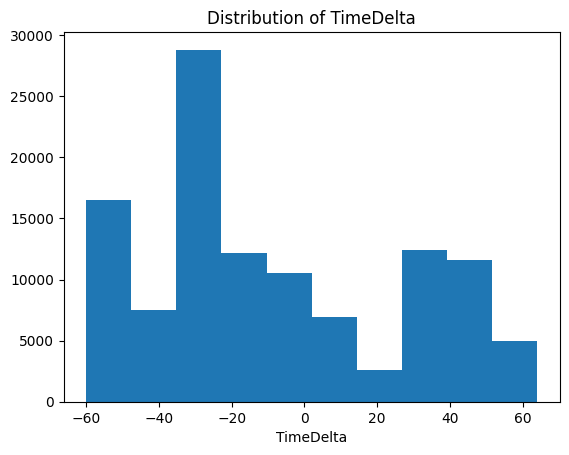

In [18]:
#Creating a histogram to visualize TimeDelta
plt.hist(data=df, x='TimeDelta');
plt.xlabel('TimeDelta');
plt.title('Distribution of TimeDelta');

The statistics of TimeDelta seem to be very scewed towards the negatives. Since the data has been cleaned, I can take a look at the distribution of loan statuses, which should give me a clue as to why this is. For this I will use a plot to help with visualization.

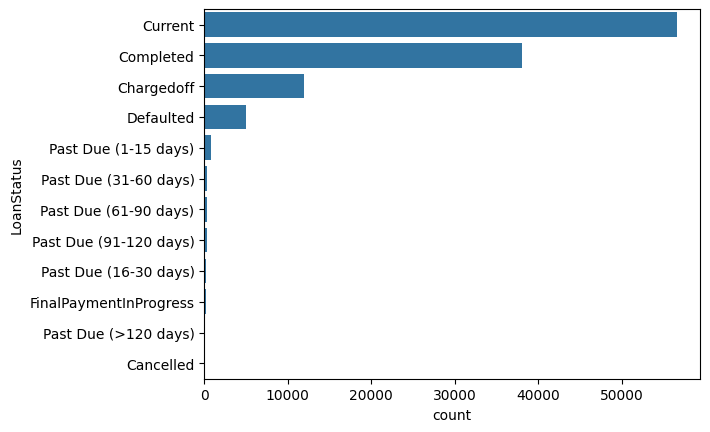

In [19]:
index = df.LoanStatus.value_counts().index
sns.countplot(data=df,y='LoanStatus',color='tab:blue', order=index);

As I suspected, the majority of loans in this dataset are listed as still in progress. Since my interest is in those loans that have reached a conclusion, I will be selecting a subset for more specific analysis.

In [20]:
df_concluded = df[(df['LoanStatus'] == 'Completed') | (df['LoanStatus'] == 'Chargedoff')]
df_concluded.LoanStatus.value_counts()

LoanStatus
Completed     38074
Chargedoff    11992
Name: count, dtype: int64

>Completed: full payment was received<br>
>Chargedoff: taken as a loss and sold to a collections agency

I will also parse out those that have been successfully paid off to look at later. These will also include loans that have had defaults occur on them, but were ultimately paid off.

In [21]:
df_completed = df[(df['LoanStatus'] == 'Completed')]
comp_defs = df_completed[(df_completed['LoanFirstDefaultedCycleNumber'] > 0)].value_counts().sum()

#In order to check if those marked completed have defaults recorded on them,
#look under column 'LoanFirstDefaultedCycleNumber'
print('Completed loans where defaults occurred:' , comp_defs, '/', df_completed.Term.value_counts().sum())

Completed loans where defaults occurred: 25 / 38074


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Yes, there was an unusual distribution in TimeDelta, which required me to look into the status of the loans included in this data.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> After looking at the distribution of loan statuses, I decided to make a subset in order to exclude those that were still in progress.

## Bivariate Exploration

> In this section, I will investigate relationships between pairs of variables in the data. Again, I will be using visualization techniques to make the distributions of variables easier to read.

Firstly, I am interested to see the distribution of number of investors compared to the loan amount. I will be looking for an area where the average range of investors is most diverse.

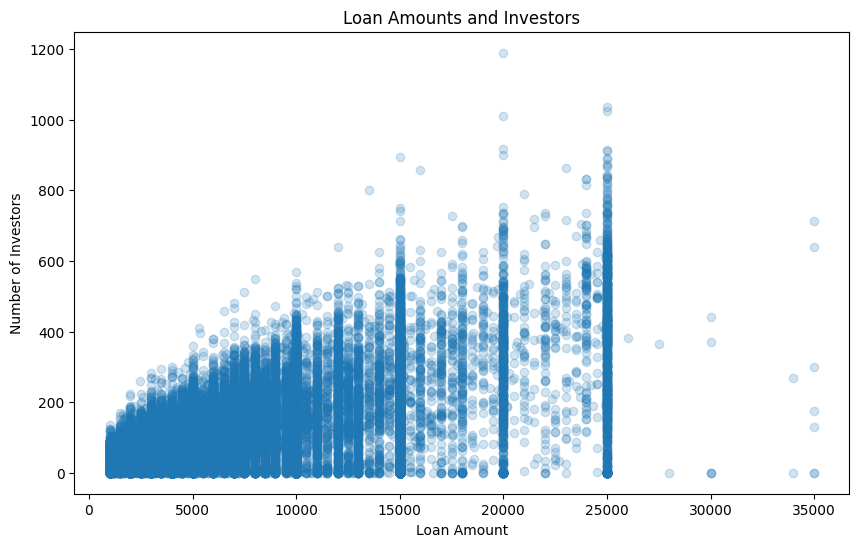

In [22]:
#Bivariate scatterplot of Loan Amount vs Number of Investors
plt.figure(figsize = [10,6])
plt.scatter(data=df_concluded, x='LoanOriginalAmount', y='Investors', alpha=1/5);
plt.xlabel('Loan Amount');
plt.ylabel('Number of Investors');
plt.title('Loan Amounts and Investors');

Even with the transparency set to a fraction, this plot is still too dense to read in this format. To get around this, I will try to plot variables differently using a box plot and separating by the loan's category.

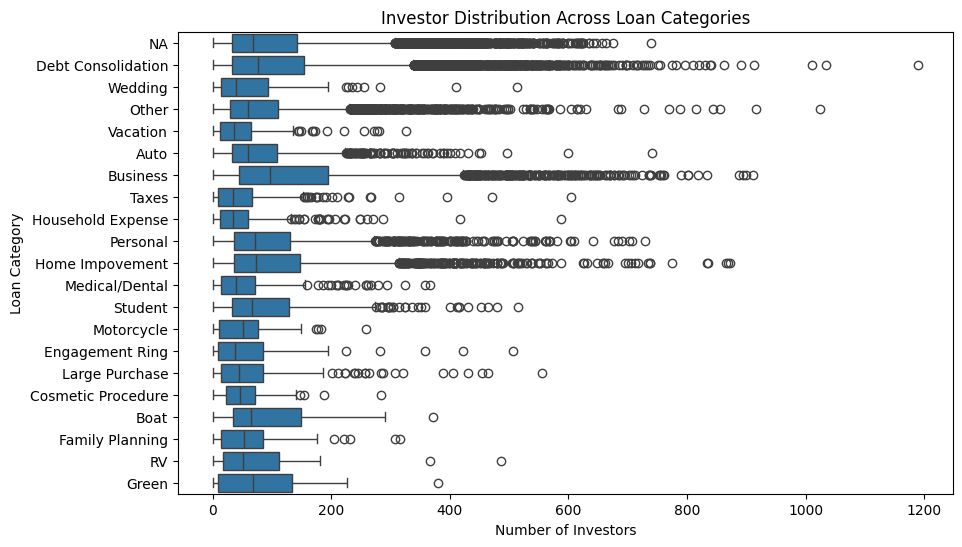

In [23]:
#Creating a bivariate boxplot of Investors to LoanCategory
plt.figure(figsize = [10,6])
sns.boxplot(data=df_concluded, x='Investors', y='LoanCategory');
plt.xlabel('Number of Investors');
plt.ylabel('Loan Category');
plt.title('Investor Distribution Across Loan Categories');

This format is much more usable. Now I can clearly see that loans that fall under the category of Business have the most diverse average range of investors. In order to narrow down the amount of data again, I will create another subset of only business loans.

In [24]:
df_bus = df[(df['LoanCategory'] == "Business")]
df_bus.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7189 entries, 78 to 113931
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Term                           7189 non-null   int64   
 1   LoanStatus                     7189 non-null   object  
 2   EmploymentStatus               7189 non-null   object  
 3   IsBorrowerHomeowner            7189 non-null   bool    
 4   IncomeRange                    7189 non-null   category
 5   LoanCurrentDaysDelinquent      7189 non-null   int64   
 6   LoanFirstDefaultedCycleNumber  7189 non-null   float64 
 7   LoanMonthsSinceOrigination     7189 non-null   int64   
 8   LoanOriginalAmount             7189 non-null   int64   
 9   MonthlyLoanPayment             7189 non-null   float64 
 10  PercentFunded                  7189 non-null   float64 
 11  Recommendations                7189 non-null   int64   
 12  InvestmentFromFriendsCount     7189 

Again, I will be selecting only those that have been completed.

In [25]:
df_bus_comp = df_bus[(df_bus['LoanStatus'] == 'Completed')]
df_bus_comp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2848 entries, 123 to 113928
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Term                           2848 non-null   int64   
 1   LoanStatus                     2848 non-null   object  
 2   EmploymentStatus               2848 non-null   object  
 3   IsBorrowerHomeowner            2848 non-null   bool    
 4   IncomeRange                    2848 non-null   category
 5   LoanCurrentDaysDelinquent      2848 non-null   int64   
 6   LoanFirstDefaultedCycleNumber  2848 non-null   float64 
 7   LoanMonthsSinceOrigination     2848 non-null   int64   
 8   LoanOriginalAmount             2848 non-null   int64   
 9   MonthlyLoanPayment             2848 non-null   float64 
 10  PercentFunded                  2848 non-null   float64 
 11  Recommendations                2848 non-null   int64   
 12  InvestmentFromFriendsCount     2848

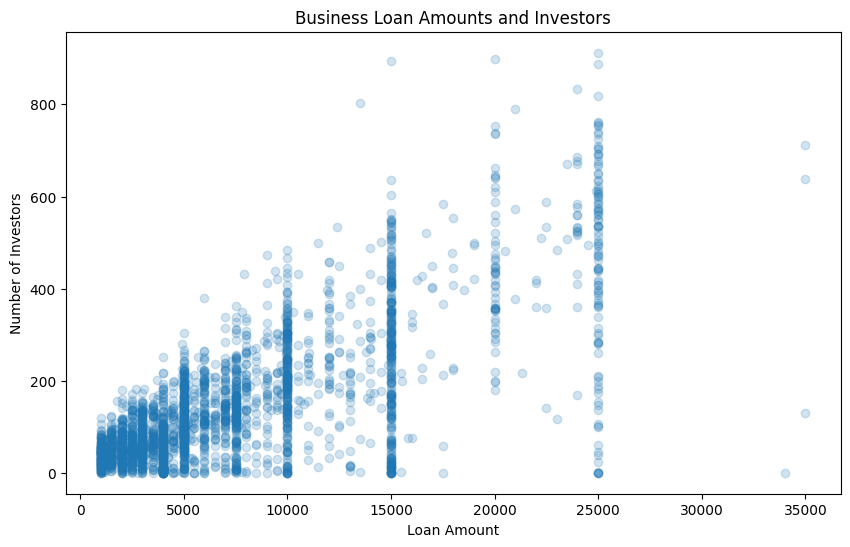

In [26]:
#Bivariate scatterplot of Loan Amount vs Number of Investors
plt.figure(figsize = [10,6])
plt.scatter(data=df_bus_comp, x='LoanOriginalAmount', y='Investors', alpha=1/5);
plt.xlabel('Loan Amount');
plt.ylabel('Number of Investors');
plt.title('Business Loan Amounts and Investors');

This is a lot easier to read now, and shows a pretty average increase in the number of investors compared to the loan's amount. However, there are still outliers and this chart does not lend any insight into if the loans were paid off within the appropriate timeframe.

In order to look into this, I will create a heatmap of LoanAmount to TimeDelta since I already expect that the amount of datapoints present would make a scatterplot hard to read.

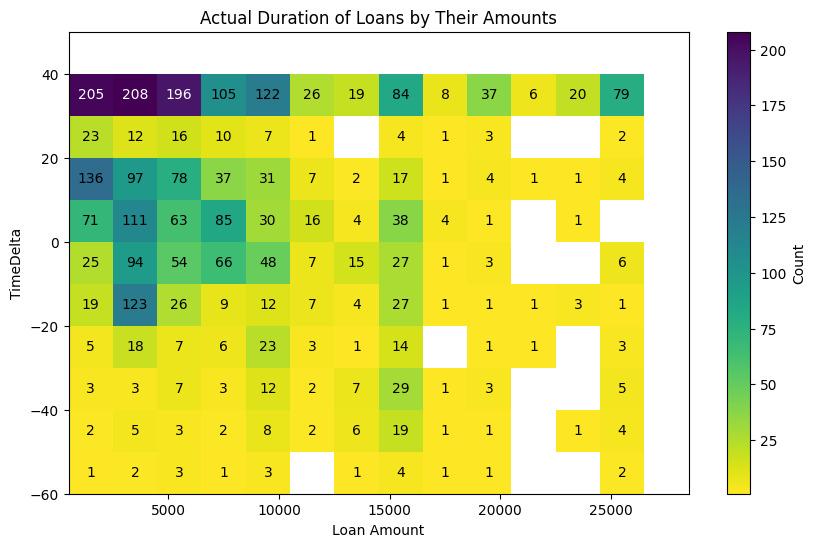

In [27]:
#Creating a bivariate heatmap comparing LoanAmount and TimeDelta
bins_x = np.arange(500, 30000, 2000)
bins_y = np.arange(-60, 60, 10)

plt.figure(figsize = [10,6])
h2d = plt.hist2d(data=df_bus_comp, x='LoanOriginalAmount', y='TimeDelta', cmap='viridis_r', cmin=0.3, bins=[bins_x,bins_y]);

counts = h2d[0]

# Add text annotation on each cell
# Loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 195: # increase visibility on darker cells
            plt.text(bins_x[i]+1000, bins_y[j]+5, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+1000, bins_y[j]+5, int(c),
                     ha = 'center', va = 'center', color = 'black')
            

plt.colorbar(label='Count');
plt.xlabel('Loan Amount');
plt.ylabel('TimeDelta');
plt.title('Actual Duration of Loans by Their Amounts');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> It was interesting to see how the number of investors varied across the different categories of loans. I think it will be interesting to dive into this more in the next section. I would like to look at the other variable that I have not yet focused on like IncomeRange.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I did not focus too heavily on TimeDelta in this section, but there were some interesting takeaways from it when I did. Even though I have excluded loans that were still in progress, there is still a good number of them that were paid off way before they were due to be. I am now wondering if other factors like IncomeRange will lend some insight into this trend.

## Multivariate Exploration

> Here I will be exploring even further and will be creating plots of three or more variables to investigate the data.

To start off, I want to look again look at the distribution of the Loan Amount versus TimeDelta. This time though, I will be including color encodings to see how many investors were involved in the loans.

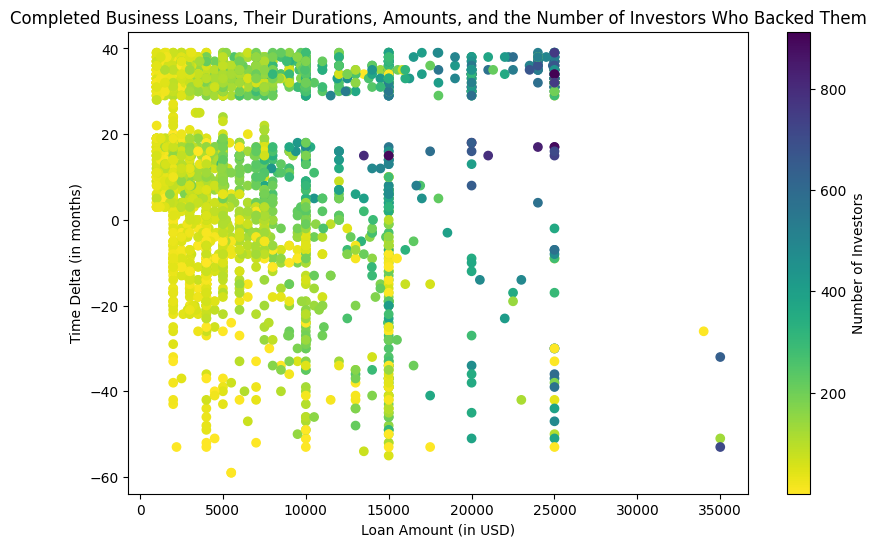

In [28]:
#Making a multivariate scatterplot with color encodings
df_bus_comp = df_completed[(df_completed['LoanCategory'] == 'Business')]
plt.figure(figsize = [10,6])
plt.scatter(data=df_bus_comp, x='LoanOriginalAmount', y='TimeDelta', c='Investors', cmap='viridis_r');
plt.xlabel('Loan Amount (in USD)');
plt.ylabel('Time Delta (in months)');
plt.colorbar(label='Number of Investors');
plt.title('Completed Business Loans, Their Durations, Amounts, and the Number of Investors Who Backed Them');

Next, I really want to see if I can find a trend comparing the borrower's income range to how on time the loan was paid off.

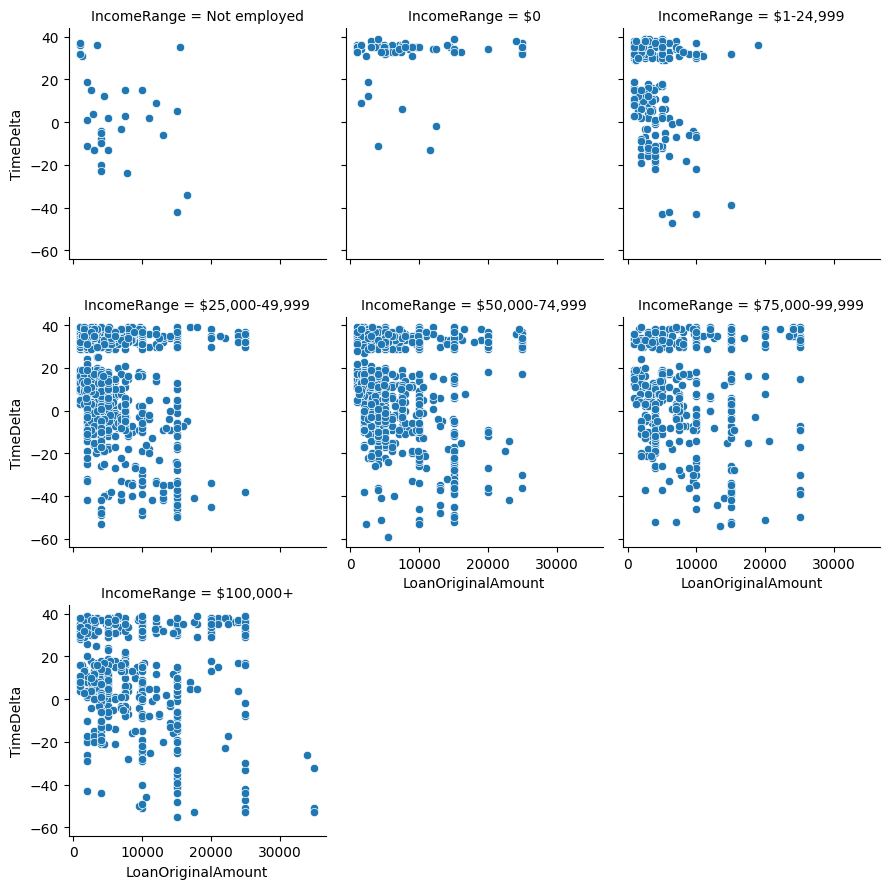

In [29]:
#Creating a FacetGrid of Completed Business Loans
g = sns.FacetGrid(data=df_bus_comp, col='IncomeRange', col_wrap=3);
g.map(sns.scatterplot, 'LoanOriginalAmount', 'TimeDelta');

Bringing the number of investors back in to view in comparison to TimeDelta.

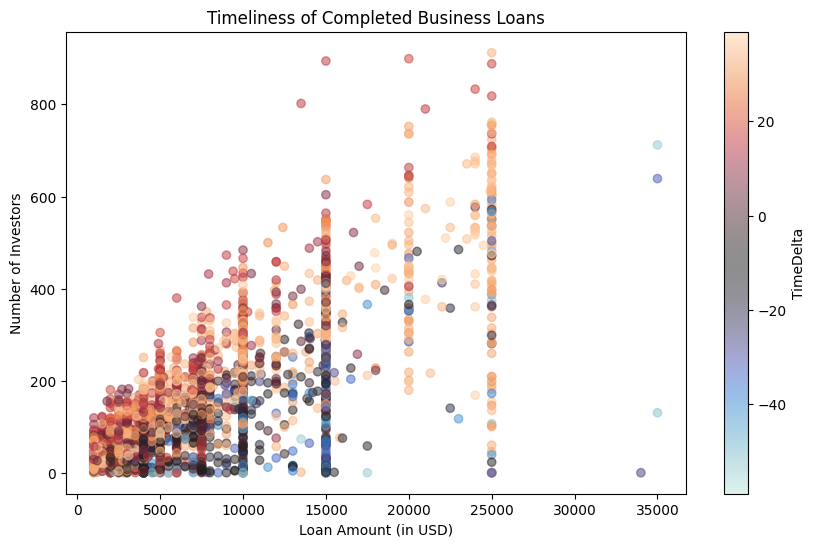

In [30]:
#Making a multivariate scatterplot with color encodings
plt.figure(figsize = [10,6])
plt.scatter(data=df_bus_comp, x='LoanOriginalAmount', y='Investors', c='TimeDelta', cmap='icefire', alpha=1/2);
plt.xlabel('Loan Amount (in USD)');
plt.ylabel('Number of Investors');
plt.colorbar(label='TimeDelta');
plt.title('Timeliness of Completed Business Loans');

While I do like this format and I can see a trend where negative values of TimeDelta correlate with lower number of investors, I have to take into consideration that these are only completed business loans and do not include those that have been charged off by those who provided the loans. 

Which is why for my last visualization, I will create a combination of Facet grids with datapoint encodings to distinguish between these two possibities.

In [31]:
#Specifying concluded loans: those that have been paid off or were charged off
df_bus_con = df_concluded[(df_concluded['LoanCategory'] == "Business")]

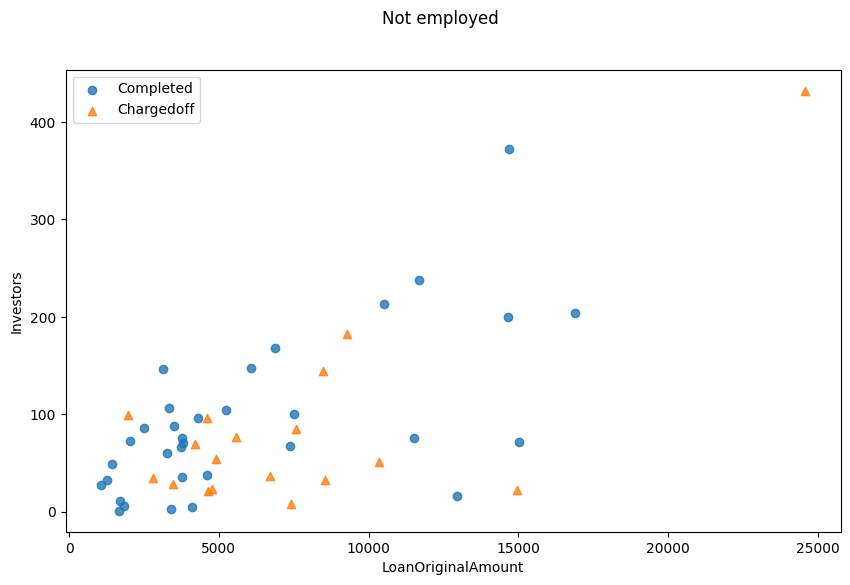

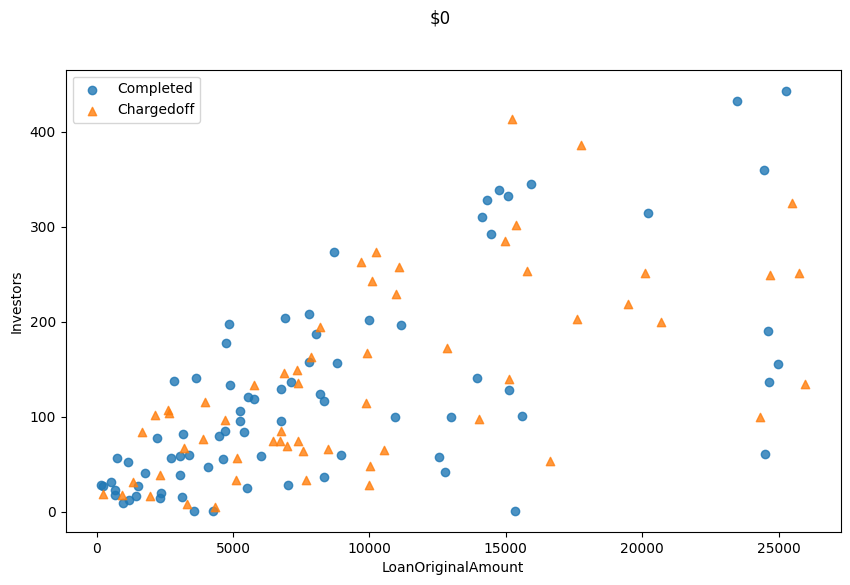

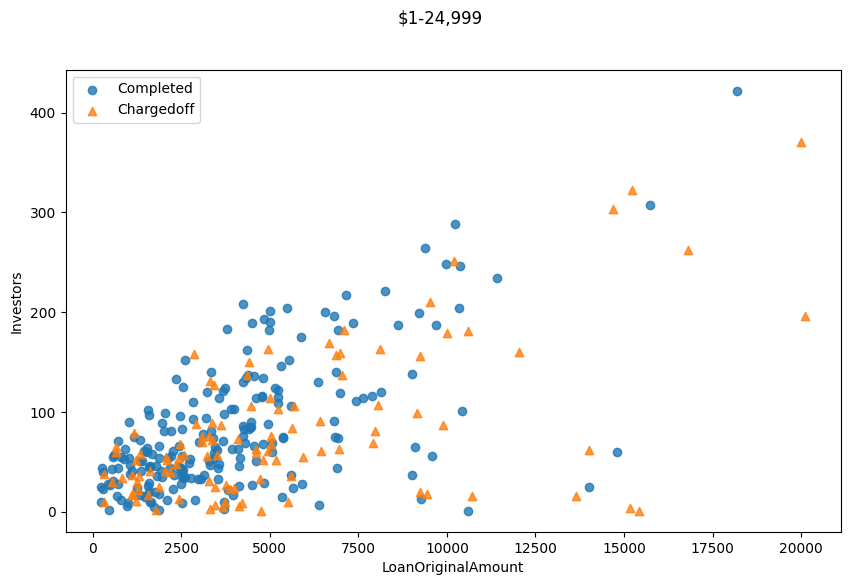

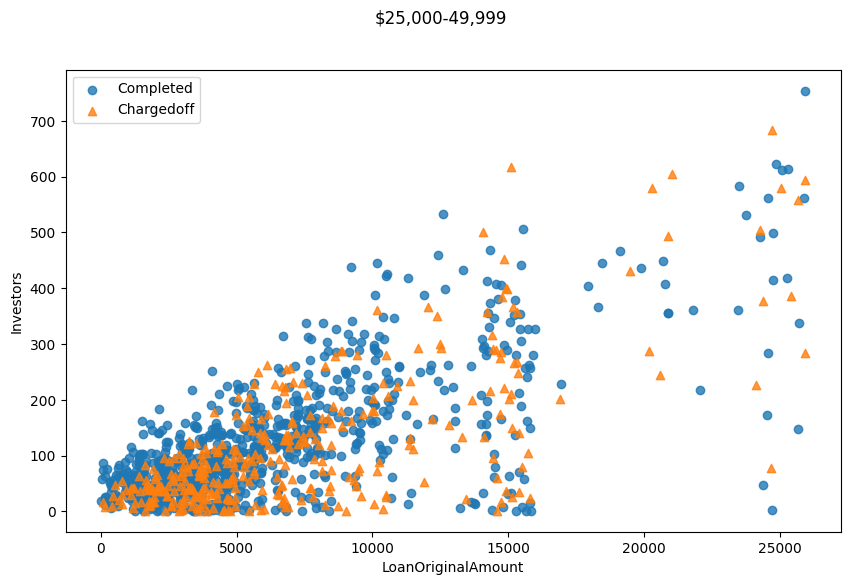

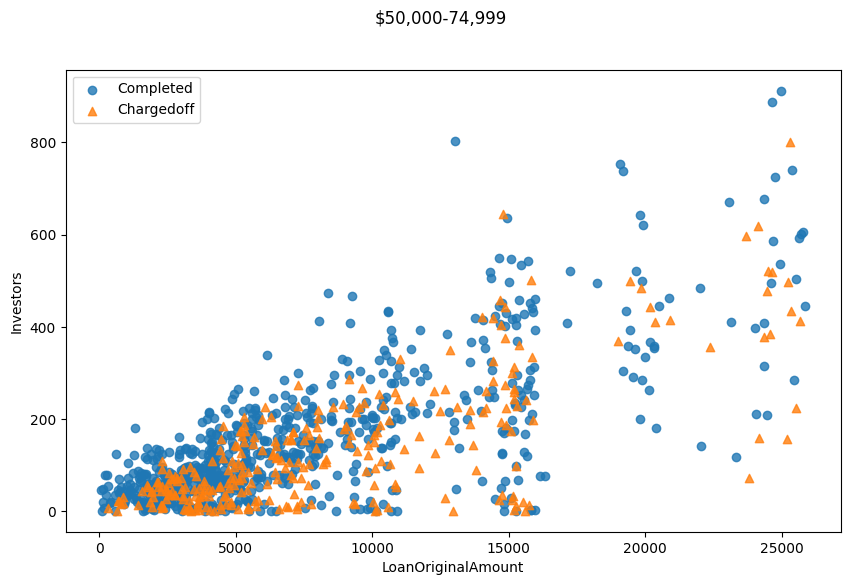

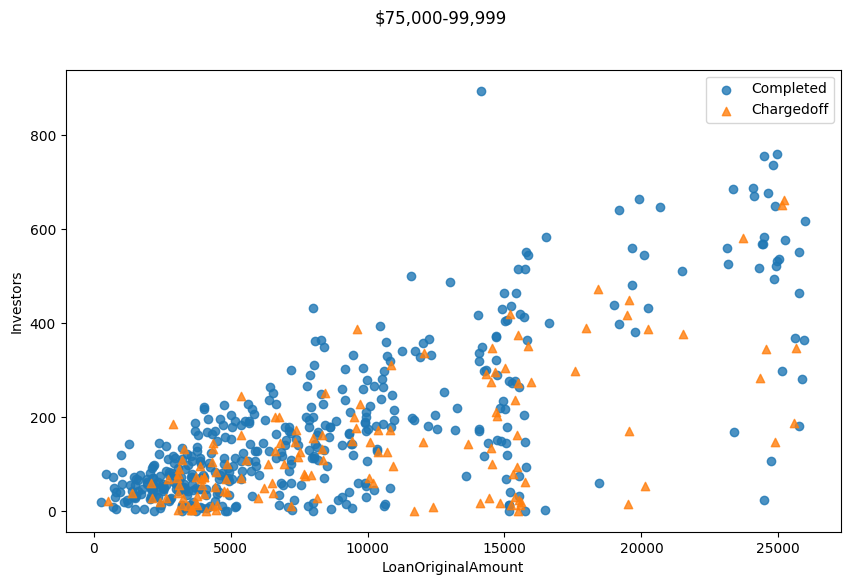

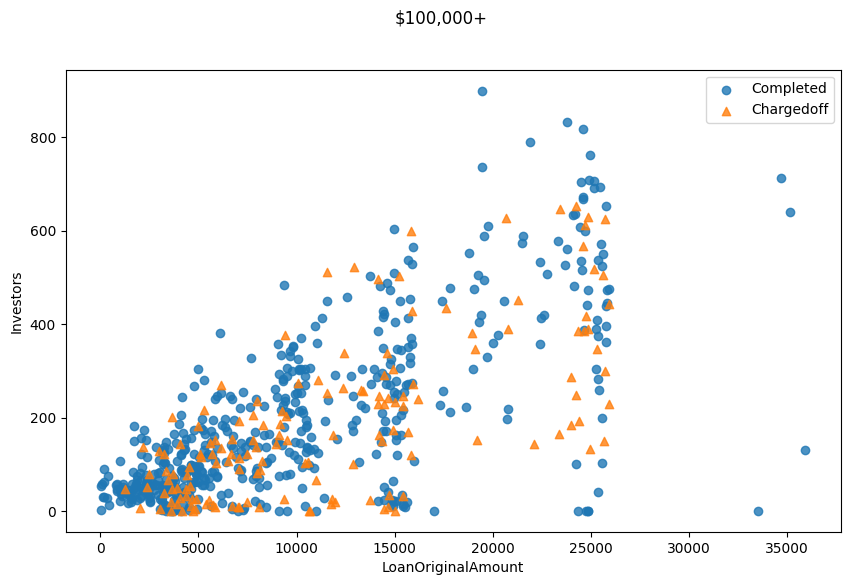

In [32]:
#Separating the data by range of income
for group in IncomeIndex:
    #Selecting the subset of concluded loans
    group_data = df_bus_con[(df_bus_con['IncomeRange'] == group)]
    #Creating encodings for completed or charged off loan statuses
    ttype_markers = [['Completed', 'o'],['Chargedoff', '^']]
    plt.figure(figsize = [10,6])
    for ttype, marker in ttype_markers:
        plot_data = group_data.loc[group_data['LoanStatus']==ttype]
        #Creating the plot within these subsets for Loan Amount versus Investors
        sns.regplot(data=plot_data, x='LoanOriginalAmount', y='Investors', fit_reg=False, marker=marker, x_jitter=1000);


    #Setting the specific title for each subplot
    plt.suptitle(group, va='top')
    #Ensuring that each have a key to distinguish the resulting loan status
    plt.legend(['Completed', 'Chargedoff'])

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Unsurprisingly, the number of investors tends to increase with the loan amount overall, with only some minor exceptions. Additionally, the income range of the borrower tends to indicate a likelihood that the loan will be paid off in advance.

### Were there any interesting or surprising interactions between features?

> There were two surprising points that I came across in this analysis. The first was that TimeDelta still shows that there are a large number of loans that are paid off weeks in advance of the loan's term. The second surprise was that regardless of income range, there is still a sizable amount of loans that end up being charged off by the loaner. I would have expected borrowers with higher income ranges to be able to keep this from happening as it is very bad for their credit in the future.

## Conclusions
> Business loans have the greatest distribution of number of investors. The number of those investors increases fairly relatively to the loan's amount. Also unsurprisingly, loans taken out by higher income ranges have more documented success of being paid off early.
> However, there are still many loans present in every category that end up being charged off by the loaner. This is regardless of income range, the number of investors, or the loan amount. Especially when it comes to higher numbers of investors overall, loans still tend to paid off later than the agreed upon timeframe.

In [33]:
df.to_csv('loan_dataset_final.csv', index=False, encoding="utf-8")